# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
def whitespaces(str):
    final = ''
    for i in range(len(str)):
        if str[i] != ' ':
            final += str[i]
    return (final)

In [6]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import owm_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city.city_name.title() not in cities:
        cities.append(city.city_name.title())
        countries.append(city.country_code.upper())

# Print the city count to confirm sufficient count
lngth = len(cities)
print(lngth)


592


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#set variable to store base url for api request
base_url = 'http://api.openweathermap.org/data/2.5/weather?appid=' + owm_key + '&q='


In [9]:
#initialize variables for DataFrame
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = [] 

#print the process of processing api calls per city
print('Beginning Data Retrival')
print('-----------------------------')
#testing with 3 -> replace with lngth
for i in range(lngth):
    response = requests.get(base_url + whitespaces(cities[i]) + ',' + countries[i]).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print('Processing Record '+ str(i+1) + ' of ' + str(lngth) + ' | ' + 'City: ' + cities[i])
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        temp.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        print(f"{response['message']}. Skipping...")

print('-----------------------------')
print('Data Retrieval Completed')
print('-----------------------------')



Beginning Data Retrival
-----------------------------
Processing Record 1 of 592 | City: Hithadhoo
Processing Record 2 of 592 | City: Colquechaca
city not found. Skipping...
Processing Record 4 of 592 | City: Jamestown
Processing Record 5 of 592 | City: Ancud
Processing Record 6 of 592 | City: Aksarka
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
Processing Record 10 of 592 | City: Carnarvon
Processing Record 11 of 592 | City: Saskylakh
Processing Record 12 of 592 | City: Rikitea
Processing Record 13 of 592 | City: Bluff
city not found. Skipping...
Processing Record 15 of 592 | City: Betulia
Processing Record 16 of 592 | City: Ambovombe
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
Processing Record 21 of 592 | City: Longyearbyen
city not found. Skipping...
Processing Record 23 of 592 | City: Busselton
city not found. Skipping...
Processing Record 25 of 592 | City: Khatanga
city not 

Processing Record 206 of 592 | City: Upernavik
Processing Record 207 of 592 | City: Hilo
Processing Record 208 of 592 | City: Ust-Tsilma
city not found. Skipping...
Processing Record 210 of 592 | City: Wellington
city not found. Skipping...
Processing Record 212 of 592 | City: Nokaneng
Processing Record 213 of 592 | City: Csepreg
city not found. Skipping...
Processing Record 215 of 592 | City: Nouadhibou
city not found. Skipping...
Processing Record 217 of 592 | City: Qaanaaq
Processing Record 218 of 592 | City: Mahibadhoo
Processing Record 219 of 592 | City: Rocha
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
Processing Record 225 of 592 | City: Mahajanga
city not found. Skipping...
Processing Record 227 of 592 | City: Torbay
Processing Record 228 of 592 | City: Broadstairs
Processing Record 229 of 592 | City: Avanigadda
city not found. Skipping...
Processing Record 231 of 592 | City: Wanxian

Processing Record 409 of 592 | City: Kawalu
Processing Record 410 of 592 | City: Kelme
city not found. Skipping...
Processing Record 412 of 592 | City: Ugoofaaru
city not found. Skipping...
Processing Record 414 of 592 | City: Izvestkovyy
Processing Record 415 of 592 | City: Shawnee
Processing Record 416 of 592 | City: Skegness
Processing Record 417 of 592 | City: Auki
city not found. Skipping...
Processing Record 419 of 592 | City: Hambantota
Processing Record 420 of 592 | City: Aykhal
city not found. Skipping...
Processing Record 422 of 592 | City: Tiruchchendur
Processing Record 423 of 592 | City: Palana
Processing Record 424 of 592 | City: Bonthe
Processing Record 425 of 592 | City: Shingu
city not found. Skipping...
Processing Record 427 of 592 | City: Nantucket
Processing Record 428 of 592 | City: Paamiut
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
city not found. Skipping...
Processing Record 433 of 592 | City: Arlit
city not found. Skippi

In [10]:
#assemble the DataFrame of results
result_df = pd.DataFrame({
    'City': cities,
    'Country': countries,
    'Latitude': lat,
    'Longitude': lng,
    'Temperature': temp,
    'Humidity (%)': humid,
    'Cloudiness (%)': cloud,
    'Wind Speed (mph)': wind
})

In [11]:
result_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Hithadhoo,MV,-0.60,73.08,301.203,100.0,32.0,6.17
1,Colquechaca,BO,-18.70,-66.00,275.903,55.0,0.0,0.42
2,Mataura,PF,NaN,NaN,NaN,NaN,NaN,NaN
3,Jamestown,SH,-15.94,-5.72,292.853,100.0,0.0,5.22
4,Ancud,CL,-41.87,-73.83,277.953,72.0,48.0,3.92


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#remove the rows where api calls returned no usable data
result_df = result_df.dropna()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
#### Latitude vs. Temperature Plot

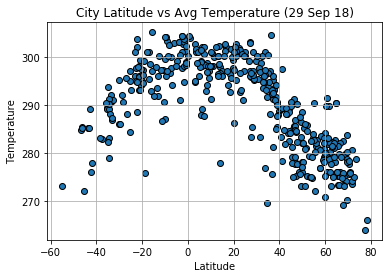

In [14]:
#scatterplot of latitude
plt.scatter(x=result_df.Latitude, 
            y=result_df.Temperature,
           edgecolor = 'black')

plt.title('City Latitude vs Avg Temperature (29 Sep 18)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid()

plt.savefig("./output_data/Lat-vs-Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

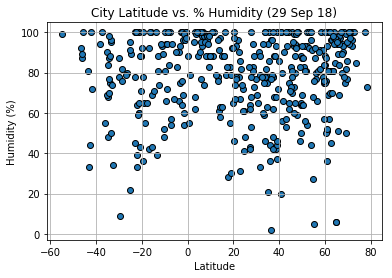

In [15]:
#latitude vs. humidity
plt.scatter(x=result_df.Latitude, 
            y=result_df['Humidity (%)'],
           edgecolor = 'black')

plt.title('City Latitude vs. % Humidity (29 Sep 18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#save plot
plt.savefig('./output_data/Lat-vs-Humid.png')

#### Latitude vs. Cloudiness Plot

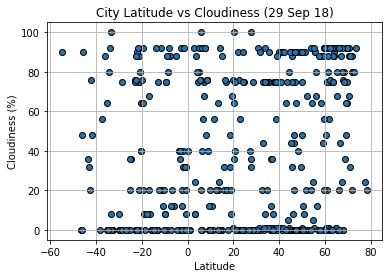

In [16]:
#Latitude vs cloudiness plt
plt.scatter(x=result_df.Latitude,
           y=result_df['Cloudiness (%)'],
           edgecolor = 'black')

plt.title('City Latitude vs Cloudiness (29 Sep 18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#save plot
plt.savefig('./output_data/Lat-vs-Cloud.png')

#### Latitude vs. Wind Speed Plot

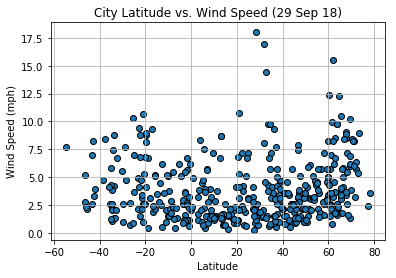

In [17]:
#Latitude vs Wind Speed
plt.scatter(x=result_df.Latitude,
           y=result_df['Wind Speed (mph)'],
           edgecolor = 'black')

plt.title('City Latitude vs. Wind Speed (29 Sep 18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#save fig
plt.savefig('./output_data/Lat-vs-WindSpeed.png')

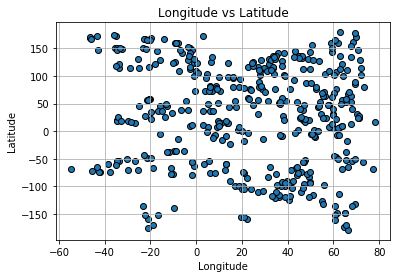

In [18]:
#rough map: lat vs lng
plt.scatter(x=result_df.Latitude,
           y=result_df.Longitude,
           edgecolor='black')

plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

#save fig
plt.savefig('./output_data/Map-Lat-vs-Long.png')